

***Linear Regression Using Python***


*** Data***

In [31]:
#https://www.geeksforgeeks.org/dataset-for-linear-regression/

***Load dataset***

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving advertising.csv to advertising.csv


In [ ]:

# Check uploaded files
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Uploaded file: advertising.csv


In [ ]:
#!pip install pandas

In [ ]:
import pandas as pd

file_path = "/content/advertising.csv"  # Path where Colab stores uploaded files
data = pd.read_csv(file_path)
print(data)


        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [33]:
# @title Correlation

import pandas as pd

# Compute correlation matrix
correlation_matrix = data.corr(method="pearson") # You can also use "spearman" or "kendall"

# Show correlation between features and target
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


In [35]:
from scipy.stats import pearsonr
# Compute correlation matrix
correlation_matrix = data.corr(method="pearson")  # Can also use "spearman" or "kendall"
print("Correlation Matrix:\n", correlation_matrix)

# Compute p-values for significance testing
p_values = pd.DataFrame(np.zeros((len(data.columns), len(data.columns))),
                        columns=data.columns, index=data.columns)

for col1 in data.columns:
    for col2 in data.columns:
        if col1 != col2:  # Avoid self-correlation
            corr, p_val = pearsonr(data[col1], data[col2])
            p_values.loc[col1, col2] = p_val
        else:
            p_values.loc[col1, col2] = np.nan  # Self-correlation is not relevant

print("\nP-values for Correlation Significance Testing:\n", p_values)

Correlation Matrix:
                  TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000

P-values for Correlation Significance Testing:
                      TV         Radio     Newspaper         Sales
TV                  NaN  4.408061e-01  4.256018e-01  7.927912e-74
Radio      4.408061e-01           NaN  2.688835e-07  3.882892e-07
Newspaper  4.256018e-01  2.688835e-07           NaN  2.548744e-02
Sales      7.927912e-74  3.882892e-07  2.548744e-02           NaN


***Create X and Y data matrices***

In [ ]:
# Define X (features) and Y (target)

Y = data[['Sales']]  # Target variable

X = data[['TV', 'Radio', 'Newspaper']]  # Feature matrix


In [ ]:
print(Y.head())

   Sales
0   22.1
1   10.4
2   12.0
3   16.5
4   17.9


In [ ]:
print(X.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4


***Data Split***

In [ ]:
# Define the split index for 80% training and 20% testing
split_index = int(len(Y) * 0.8)
print(split_index)

160


In [ ]:

# Manual splitting

Y_train= Y[:split_index]

Y_test=Y[split_index:]

X_train=X[:split_index]

X_test= X[split_index:]


In [ ]:
X_train.shape, Y_train.shape

((160, 3), (160, 1))

In [ ]:
X_test.shape, Y_test.shape

((40, 3), (40, 1))

***Linear Regression Model***

In [ ]:
#!pip install scikit-learn

In [ ]:
from sklearn import linear_model


***Defines the regression model***

In [ ]:
model = linear_model.LinearRegression()

***Model training ***

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [[0.05472077 0.10477602 0.00306638]]
Intercept: [4.48194957]


In [ ]:
import statsmodels.api as sm
# Add a column of ones to X_train for the intercept
X_train_sm = sm.add_constant(X_train)

# Fit using statsmodels
ols_model = sm.OLS(Y_train, X_train_sm).fit()

# Print p-values
print("\nP-values:")
print(ols_model.pvalues)


P-values:
const        7.184154e-26
TV           3.375218e-76
Radio        1.759792e-20
Newspaper    6.372896e-01
dtype: float64


***Apply trained model to make prediction (on test set)***

In [ ]:
# Predict values for training and testing sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#!pip install pandas
import numpy as np

In [ ]:
# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate R-Squared (R²)
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

# Calculate Adjusted R-Squared
def adjusted_r2(r2, X):
    n = X.shape[0]  # Number of observations
    p = X.shape[1]  # Number of predictors/features
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

adj_r2_train = adjusted_r2(r2_train, X_train)
adj_r2_test = adjusted_r2(r2_test, X_test)


In [ ]:
# Display results

print(f"Training MSE: {mse_train:.2f}, Testing MSE: {mse_test:.2f}")
print(f"Training RMSE: {rmse_train:.2f}, Testing RMSE: {rmse_test:.2f}")
print(f"Training R²: {r2_train:.2f}, Testing R²: {r2_test:.2f}")
print(f"Training Adjusted R²: {adj_r2_train:.2f}, Testing Adjusted R²: {adj_r2_test:.2f}")

Training MSE: 2.73, Testing MSE: 2.64
Training RMSE: 1.65, Testing RMSE: 1.62
Training R²: 0.90, Testing R²: 0.90
Training Adjusted R²: 0.90, Testing Adjusted R²: 0.89


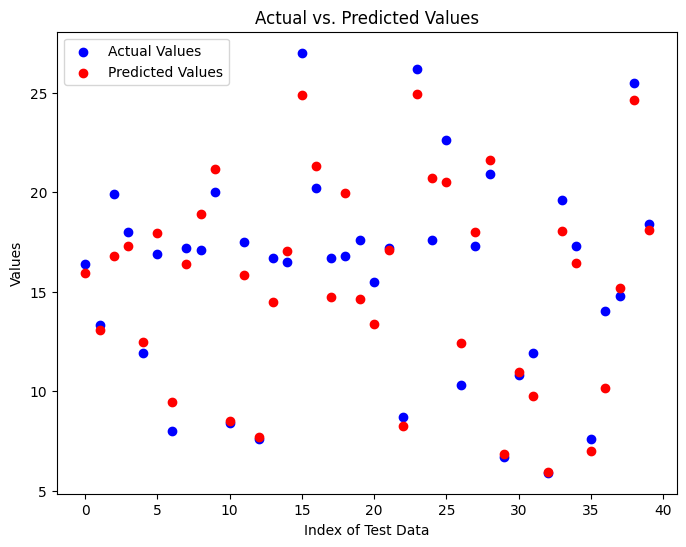

In [ ]:
# @title Scatter plot
#!pip install matplotlib
import matplotlib.pyplot as plt
# Create figure
plt.figure(figsize=(8, 6))

# Plot Actual Values (Y_test) in Blue
plt.scatter(range(len(Y_test)), Y_test, color="blue", label="Actual Values")

# Plot Predicted Values (Y_pred) in Red
plt.scatter(range(len(Y_test_pred)), Y_test_pred, color="red", label="Predicted Values")

# Labels and Title
plt.xlabel("Index of Test Data")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values")
 # Show legend
plt.legend()

# Show plot
plt.show()


***Save the results in Excel file***

In [ ]:
# Create DataFrames for training and testing data
train_data = pd.DataFrame({
    "Y_train": Y_train.values.ravel(),  # Convert to NumPy array first
    "Y_train_pred": Y_train_pred.ravel()
})

test_data = pd.DataFrame({
    "Y_test": Y_test.values.ravel(),
    "Y_test_pred": Y_test_pred.ravel()
})

# Save to an Excel file with two sheets
with pd.ExcelWriter("Results of LR Model for Adverise data.xlsx") as writer:
    train_data.to_excel(writer, index=True, sheet_name="Training Data")
    test_data.to_excel(writer, index=True, sheet_name="Testing Data")

print("Excel file with separate sheets saved successfully.")

Excel file with separate sheets saved successfully.
